<a href="https://colab.research.google.com/gist/sai2043/54602859ce3b1eca8f784e5e41165182/untitled31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q fastai2

     |████████████████████████████████| 194kB 2.6MB/s 


In [ ]:
from fastai2.vision.all import *
from pathlib import Path

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()


(#4) [Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/export.pkl'),Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/images')]

In [ ]:
codes = np.loadtxt(path/'codes.txt', dtype=str)


In [ ]:
fnames = get_image_files(path/"images")

In [ ]:
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"


In [ ]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = fnames, label_func = label_func, codes = codes
)


In [ ]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,time
0,2.642311,2.384189,01:01


epoch,train_loss,valid_loss,time
0,1.729851,1.563206,01:06
1,1.506851,1.579480,01:06
2,1.421958,1.551537,01:06
3,1.295408,1.125273,01:09
4,1.176191,0.933962,01:07
5,1.067434,0.945956,01:06
6,0.976007,0.862534,01:06
7,0.904792,0.859937,01:06


In [ ]:
learn.export()

In [ ]:
path.ls(file_exts='.pkl')

(#1) [Path('/root/.fastai/data/camvid_tiny/export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
!wget -q https://cdn.motor1.com/images/mgl/kwwJe/s1/tesla-model-3-dashcam-captures-road-rage-incident.jpg

In [ ]:
output_mask = learn_inf.predict('tesla-model-3-dashcam-captures-road-rage-incident.jpg')

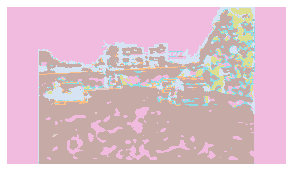

In [ ]:
output_mask[0].show(figsize=(5,5))

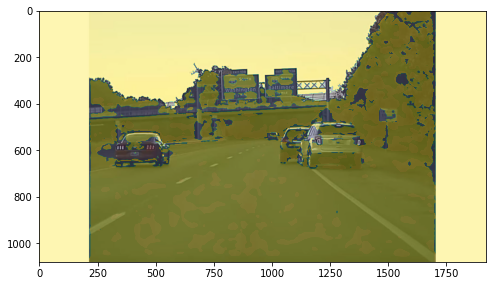

In [ ]:
im=Image.open('tesla-model-3-dashcam-captures-road-rage-incident.jpg')
plt.rcParams["figure.figsize"] = (8,8)
plt.imshow(im)
plt.imshow(output_mask[0],vmax=18,vmin=0,alpha=0.35)
